# BTC Market Cap and Dominance Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
from utils import *

## Dominance

In [3]:
def cal_dominance():
    BTC_Dominance = pd.read_csv('assets/BTC_Dominance.csv', parse_dates=True, index_col='time')
    ETH_Dominance = pd.read_csv('assets/ETH_Dominance.csv', parse_dates=True, index_col='time')
    return pd.concat([BTC_Dominance, ETH_Dominance], axis=1)

In [4]:
df_dominance = cal_dominance()

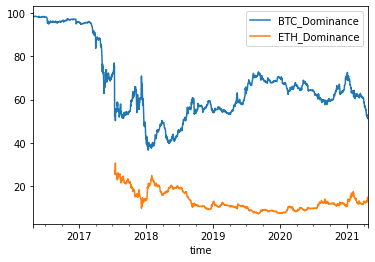

In [5]:
normal_plot(df_dominance)

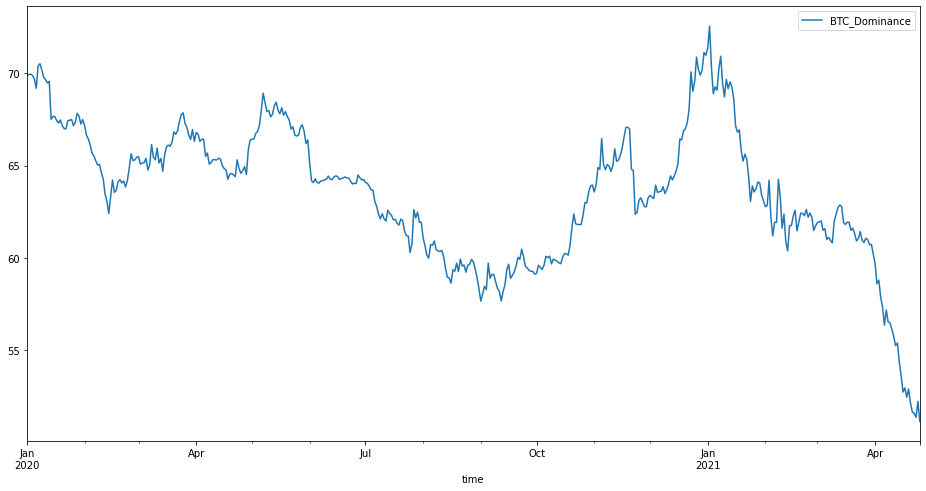

In [6]:
normal_plot(df_dominance.BTC_Dominance.loc['2020-01-01':], figsize=(16,8))

## Market Caps

In [7]:
def cal_market_cap():
    allmcap = pd.read_csv('assets/AllCrypto_MarketCap.csv', parse_dates=True, index_col='time')
    exBTCmcap = pd.read_csv('assets/exBTC_MarketCap.csv', parse_dates=True, index_col='time')
    Btcmcap = allmcap-exBTCmcap
    df_mcap = pd.concat([allmcap, exBTCmcap], axis=1)
    df_mcap['BTCmcap'] =  df_mcap.AllCrypto_MarketCap - df_mcap.exBTC_MarketCap
    return df_mcap

## Per 1000 Initial Investment

In [8]:
def cal_nav_per_init_inv(start, init_fund=1000):
    df_mcap = cal_market_cap()
    df_inv = df_mcap.loc[start:]
    df_nav = df_inv/df_inv.iloc[0] * init_fund
    return df_nav

In [9]:
def cal_metrics(df):
    columns = ['mu','sigma','sharpe']
    musigsh = pd.DataFrame(cal_sharpe(df), index=columns).T
    mdd = pd.Series([cal_drawdown(ts).mdd for _,ts in df.items()], index=df.columns, name='mdd')
    result = pd.concat([musigsh, mdd], axis=1)
    return result

In [10]:
def scenario(start, init_fund=1000, **fig):
    df = cal_nav_per_init_inv(start, init_fund)
    print(cal_metrics(df).applymap(lambda x: f'{x:.1%}'))
    logy_plot(df, **fig)

                        mu  sigma sharpe     mdd
AllCrypto_MarketCap  25.6%  67.8%  37.7%  -86.5%
exBTC_MarketCap      22.0%  74.9%  29.3%  -91.0%
BTCmcap              29.8%  66.0%  45.1%  -80.7%


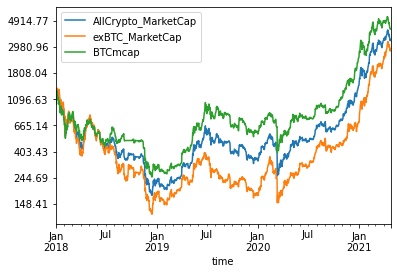

In [11]:
scenario('2018-01-01', 1000)

                        mu  sigma  sharpe     mdd
AllCrypto_MarketCap  80.7%  62.8%  128.7%  -61.6%
exBTC_MarketCap      83.0%  66.5%  124.7%  -61.5%
BTCmcap              78.8%  64.2%  122.7%  -61.6%


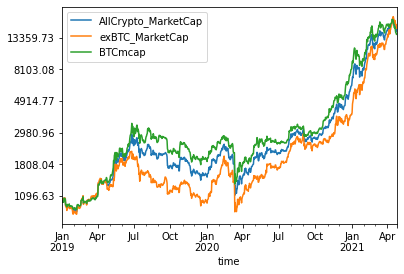

In [12]:
scenario('2019-01-01', 1000)

                         mu  sigma  sharpe     mdd
AllCrypto_MarketCap  120.0%  67.2%  178.7%  -55.3%
exBTC_MarketCap      145.5%  72.0%  202.2%  -58.5%
BTCmcap              103.6%  68.4%  151.4%  -53.3%


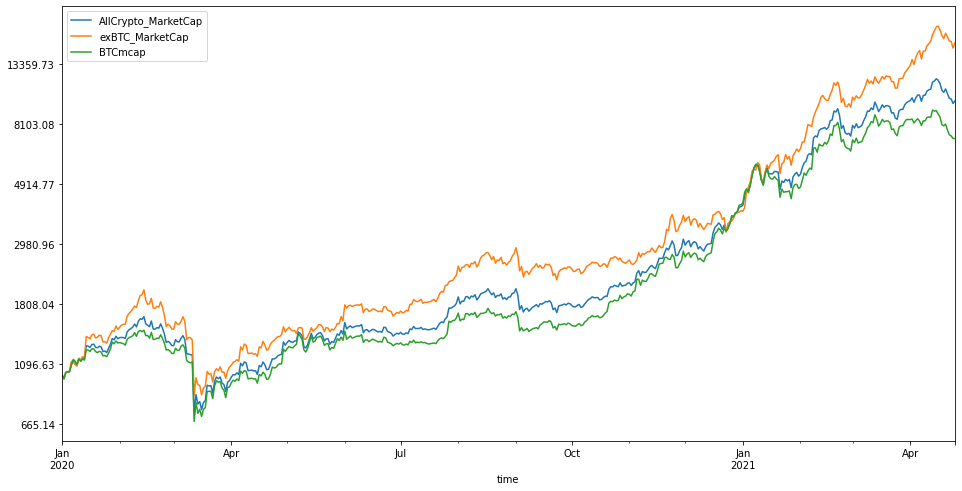

In [13]:
scenario('2020-01-01', 1000, figsize=(16,8))

                         mu  sigma  sharpe     mdd
AllCrypto_MarketCap  192.7%  67.8%  284.0%  -20.4%
exBTC_MarketCap      310.7%  72.6%  427.8%  -19.0%
BTCmcap              119.0%  71.6%  166.1%  -25.1%


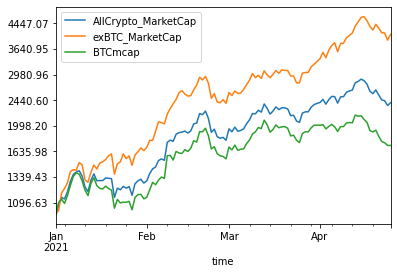

In [14]:
scenario('2021-01-01', 1000)